# Optimización parámétrica de Algoritmos Genéticos

In [1]:
import random
import numpy as np
from binaryga import * # implementación de algoritmos genéticos
import matplotlib.pyplot as plt
import testfunctions
from math import *
%matplotlib inline

## Función de Rastring 
$$ f(\mathbf{x}) = A n + \sum_{i=1}^n \left[x_i^2 - A\cos(2 \pi x_i)\right]$$
$$ \text{where: }  A=10 $$

**Mínimo global**
$ f(0, \dots, 0) = 0f(0, \dots, 0) = 0$

**Espacio de búsqueda**
$ -5.12\le x_{i} \le 5.12 -5.12\le x_{i} \le 5.12 $

![](Rastrigin_function.png)

### Dos variables

In [2]:
func_obj = testfunctions.rastring
parametros = { "precis": 4,
                   "lim_inf": func_obj.vars_range[0],
                   'lim_sup': func_obj.vars_range[1],
                   'num_vars': 2,
                   'test_function': func_obj,
                   'size_population': 150,
                   'p_crosover': 0.5,
                   'p_mutation': 0.1, # por default : 1/ len(gen)
                   'max_num_generations': 200,
                   'len_elite': 0 ,
                   'tol_time': None,
                   'plotting': False
                   }

last_generation, \
    worst_apt_per_generation, \
    mean_apt_per_generation, \
    best_apt_per_generation = bincode_ga(**parametros)


0.1


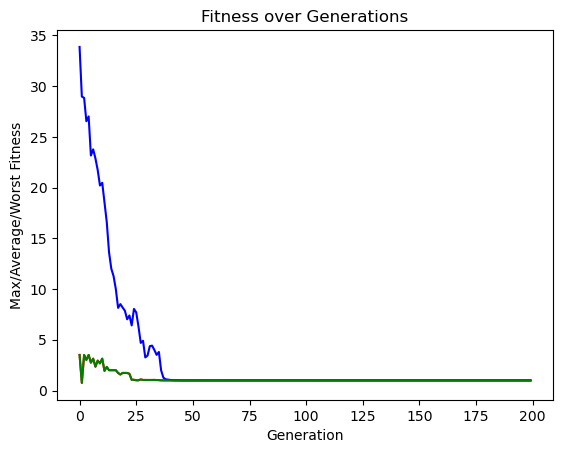

In [3]:
plt.plot(best_apt_per_generation, color='red')
plt.plot(mean_apt_per_generation, color='blue')
plt.plot(worst_apt_per_generation, color='green')
plt.xlabel('Generation')
plt.ylabel('Max/Average/Worst Fitness')
plt.title('Fitness over Generations')
plt.show()

#### Mejores 10

In [4]:
last_generation.sort(key=lambda x : x.val )
[ind.val for ind in last_generation][:10]

[0.9949602830645752,
 0.9949602830645752,
 0.9949602830645752,
 0.9949602830645752,
 0.9949602830645752,
 0.9949602830645752,
 0.9949602830645752,
 0.9949602830645752,
 0.9949602830645752,
 0.9949602830645752]

#### Gráfica de la última población

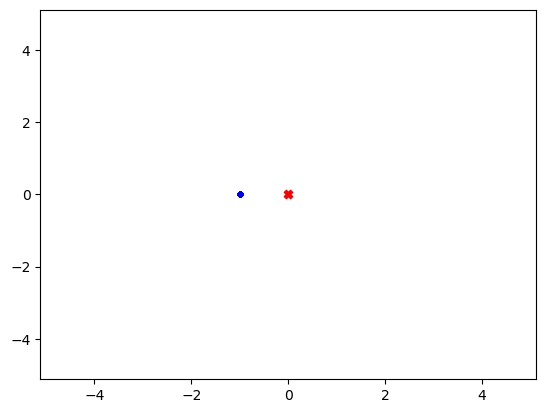

In [5]:
plt.figure(1)
plt.xlim(-5.12,5.12)
plt.ylim(-5.12,5.12)
globalMinima = func_obj.minima
phenotype_last_gen = [ind.fenotipo for ind in last_generation]
plt.scatter(*zip(*globalMinima), marker='X', color='red',zorder=1)
plt.scatter(*zip(*phenotype_last_gen), marker='.', color='blue',zorder=0)


In [6]:
print( last_generation[0] )

gen = [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
fenotipo = [-0.9948904029113992, -3.906279802556867e-05]
valor = 0.9949602830645752



### Cinco variables

In [7]:
func_obj = testfunctions.rastring
parametros = { "precis": 4,
                   "lim_inf": func_obj.vars_range[0],
                   'lim_sup': func_obj.vars_range[1],
                   'num_vars': 5,
                   'test_function': func_obj,
                   'size_population': 150,
                   'p_crosover': 0.5,
                   'p_mutation': -1, # por default : 1/ len(gen)
                   'max_num_generations': 200,
                   'len_elite': 0 ,
                   'tol_time': None,
                   'plotting': False
                   }

last_generation, \
    worst_apt_per_generation, \
    mean_apt_per_generation, \
    best_apt_per_generation = bincode_ga(**parametros)


0.011764705882352941


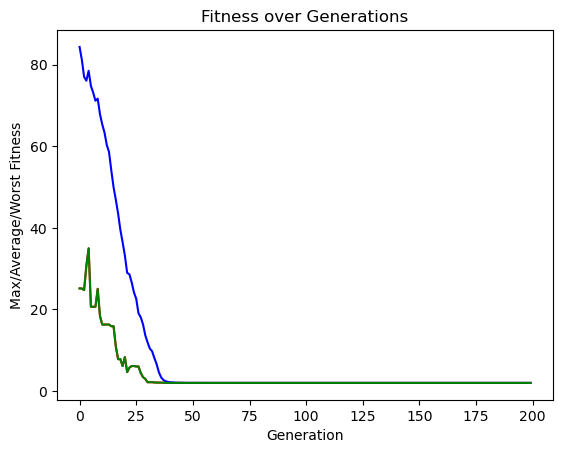

In [8]:
plt.plot(best_apt_per_generation, color='red')
plt.plot(mean_apt_per_generation, color='blue')
plt.plot(worst_apt_per_generation, color='green')
plt.xlabel('Generation')
plt.ylabel('Max/Average/Worst Fitness')
plt.title('Fitness over Generations')
plt.show()

## Función Rosenbrock
$$f(\boldsymbol{x}) = \sum_{i=1}^{n-1} \left[ 100 \left(x_{i+1} - x_{i}^{2}\right)^{2} + \left(1 - x_{i}\right)^{2}\right]$$
**Mínimo Global**

$\text{Min} =
\begin{cases}
n=2 & \rightarrow \quad f(1,1) = 0, \\
n=3 & \rightarrow \quad f(1,1,1) = 0, \\
n>3 & \rightarrow \quad f(\underbrace{1,\dots,1}_{n \text{ times}}) = 0 \\
\end{cases}\text{Min} =
\begin{cases}
n=2 & \rightarrow \quad f(1,1) = 0, \\
n=3 & \rightarrow \quad f(1,1,1) = 0, \\
n>3 & \rightarrow \quad f(\underbrace{1,\dots,1}_{n \text{ times}}) = 0 \\
\end{cases}$

**Espacio de Búsqueda**

para este ejemplo: $x_i \in (-10,10)$
![](Rosenbrock-contour.svg.png)

### Dos variables

In [2]:
func_obj = testfunctions.rosenbrock
parametros = { "precis": 4,
                   "lim_inf": func_obj.vars_range[0],
                   'lim_sup': func_obj.vars_range[1],
                   'num_vars': 2,
                   'test_function': func_obj,
                   'size_population': 150,
                   'p_crosover': 0.5,
                   'p_mutation': 0.2, # por default : 1/ len(gen)
                   'max_num_generations': 200,
                   'len_elite': 0 ,
                   'tol_time': None,
                   'plotting': False
                   }

last_generation, \
    worst_apt_per_generation, \
    mean_apt_per_generation, \
    best_apt_per_generation = bincode_ga(**parametros)


0.2


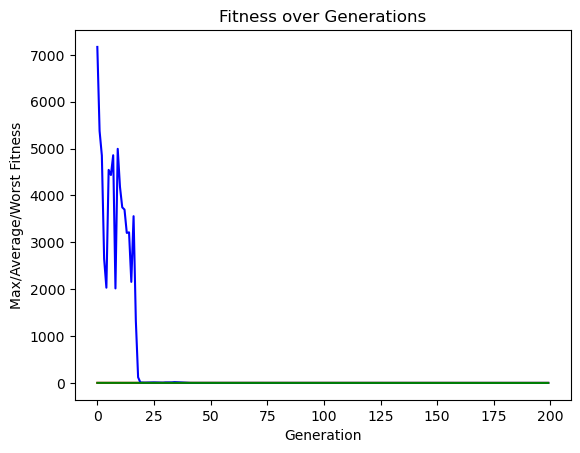

In [3]:
plt.plot(best_apt_per_generation, color='red')
plt.plot(mean_apt_per_generation, color='blue')
plt.plot(worst_apt_per_generation, color='green')
plt.xlabel('Generation')
plt.ylabel('Max/Average/Worst Fitness')
plt.title('Fitness over Generations')
plt.show()

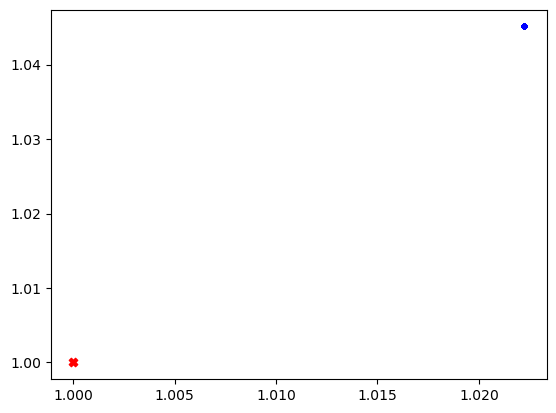

In [4]:
plt.figure(1)
globalMinima = func_obj.minima
phenotype_last_gen = [ind.fenotipo for ind in last_generation]
plt.scatter(*zip(*globalMinima), marker='X', color='red',zorder=1)
plt.scatter(*zip(*phenotype_last_gen), marker='.', color='blue',zorder=0)


In [6]:
last_generation.sort(key = lambda x : x.val,reverse = True)
print(last_generation[0])

gen = [1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0]
fenotipo = [1.0222322252824805, 1.0451205835005455]
valor = 0.0004968917424046173



## Función de Himmelblau
$$ f(x, y) = (x^2+y-11)^2 + (x+y^2-7)^2.\quad $$

**Mínimo global:**

$
\text{Min} =
\begin{cases}
      f\left(3.0,  2.0\right) & = 0.0 \\
      f\left(-2.805118, 3.131312\right) & = 0.0 \\
      f\left(-3.779310, -3.283186\right) & = 0.0 \\
      f\left(3.584428, -1.848126\right) & = 0.0 \\
\end{cases}$

**Espacio de Búsqueda:** $-5\le x,y \le 5$

![](Himmelblau_function.svg.png )

In [41]:
func_obj = testfunctions.himmelblau
parametros = { "precis": 4,
                   "lim_inf": func_obj.vars_range[0],
                   'lim_sup': func_obj.vars_range[1],
                   'num_vars': 2,
                   'test_function': func_obj,
                   'size_population': 150,
                   'p_crosover': 0.5,
                   'p_mutation': 1.0, # por default : 1/ len(gen)
                   'max_num_generations': 100,
                   'len_elite': 0 ,
                   'tol_time': None,
                   'plotting': False
                   }

last_generation, \
    worst_apt_per_generation, \
    mean_apt_per_generation, \
    best_apt_per_generation = bincode_ga(**parametros)


1.0


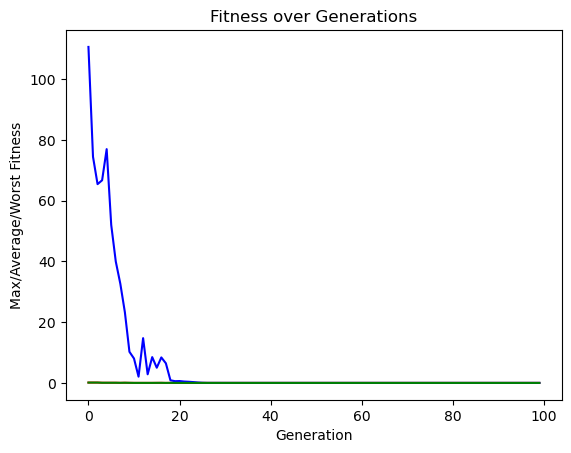

In [42]:
plt.plot(best_apt_per_generation, color='red')
plt.plot(mean_apt_per_generation, color='blue')
plt.plot(worst_apt_per_generation, color='green')
plt.xlabel('Generation')
plt.ylabel('Max/Average/Worst Fitness')
plt.title('Fitness over Generations')
plt.show()

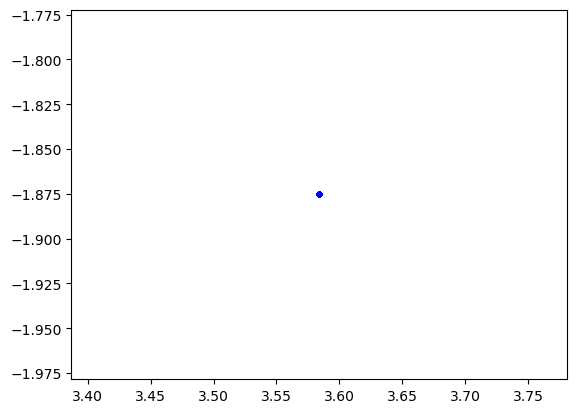

In [43]:
plt.figure(1)
globalMinima = func_obj.minima
phenotype_last_gen = [ind.fenotipo for ind in last_generation]
#plt.scatter(*zip(*globalMinima), marker='X', color='red',zorder=1)
plt.scatter(*zip(*phenotype_last_gen), marker='.', color='blue',zorder=0)
plt.show()

In [21]:
last_generation.sort(key = lambda x : x.val,reverse = True)
for ind in last_generation[::5]:
    print(ind)

gen = [1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
fenotipo = [2.998641957412395, 2.002006546070451]
valor = 8.221576914389098e-05

gen = [1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
fenotipo = [2.998641957412395, 2.002006546070451]
valor = 8.221576914389098e-05

gen = [1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
fenotipo = [2.998641957412395, 2.002006546070451]
valor = 8.221576914389098e-05

gen = [1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
fenotipo = [2.998641957412395, 2.002006546070451]
valor = 8.221576914389098e-05

gen = [1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
fenotipo = [2.998641957412395, 2.002006546070451]
valor = 8.221576914389098e-05

gen = [1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1

## Función Eggholder

$$ f(x,y) = - \left(y+47\right) \sin \sqrt{\left|\frac{x}{2}+\left(y+47\right)\right|} - x \sin \sqrt{\left|x - \left(y + 47 \right)\right|} $$

**Mínimo global:**
    
$f(512, 404.2319) = -959.6407$

**Espacio de Búsqueda**

$-512\le x,y \le 512 $

In [7]:
func_obj = testfunctions.eggholder
parametros = { "precis": 4,
                   "lim_inf": func_obj.vars_range[0],
                   'lim_sup': func_obj.vars_range[1],
                   'num_vars': 2,
                   'test_function': func_obj,
                   'size_population': 150,
                   'p_crosover': 0.5,
                   'p_mutation': 0.2, # por default : 1/ len(gen)
                   'max_num_generations': 200,
                   'len_elite': 0 ,
                   'tol_time': None,
                   'plotting': False
                   }

last_generation, \
    worst_apt_per_generation, \
    mean_apt_per_generation, \
    best_apt_per_generation = bincode_ga(**parametros)


0.2


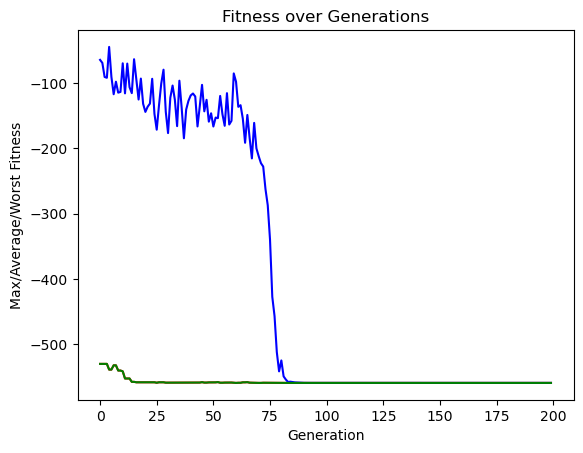

In [8]:
plt.plot(best_apt_per_generation, color='red')
plt.plot(mean_apt_per_generation, color='blue')
plt.plot(worst_apt_per_generation, color='green')
plt.xlabel('Generation')
plt.ylabel('Max/Average/Worst Fitness')
plt.title('Fitness over Generations')
plt.show()

In [10]:
plt.figure(1)
globalMinima = func_obj.minima
phenotype_last_gen = [ind.fenotipo for ind in last_generation]
plt.scatter(*zip(*globalMinima), marker='X', color='red',zorder=1)
plt.scatter(*zip(*phenotype_last_gen), marker='.', color='blue',zorder=0)


TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

<Figure size 640x480 with 0 Axes>

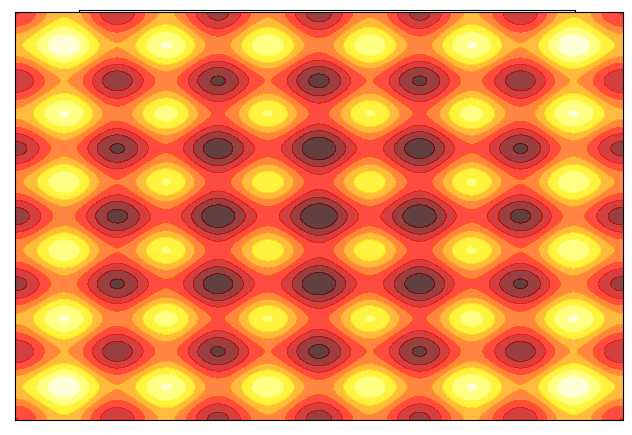

In [44]:
def rastring_plot(x,y):
    A=10
    return A*2 + (x**2-A*np.cos(2*np.pi*x))+y**2-A*np.cos(2*np.pi*y)
plt.figure(1)
globalMinima = func_obj.minima
phenotype_last_gen = [ind.fenotipo for ind in last_generation]
plt.scatter(*zip(*globalMinima), marker='X', color='red',zorder=1)
plt.scatter(*zip(*phenotype_last_gen), marker='.', color='blue',zorder=0)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X,Y = np.meshgrid(x, y)
f= rastring_plot

plt.axes([0.025, 0.025, 0.95, 0.85])

plt.contourf(X, Y, f(X, Y), 8, alpha=.75, cmap=plt.cm.hot)

plt.xticks([])
plt.yticks([])
plt.show()